In [96]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from statsmodels.stats import diagnostic
from scipy import stats

## First step : Data pre-processing

During, this step, we will process the data, clean and merge all the informations needed for the project. 
We will clean all the csv files one by one, and then create a new database with only the informations needed. 

- **beers_matched.csv** : In order to analyze which are the beers the most popular over time, we need to only keep the beers whose the number or ratings is significant. Indeed, many beers on both websites have no ratings, so we have decided to filter them out.

### Cleaning and pre-processing of the file "beers_matched.csv"

We have decided to work on the file *beer_matched* because we want to aggregate the informations of both websites. As our analysis will be based on the most popular beers, losing some beers which are not on the two websites is not a problem here because the most popular one will be refered on both websites. 

In [25]:
beers = pd.read_csv("beers_matched.csv", delimiter=",", header=[0,1])
beers.head()

ba                                                                \
   abv   avg avg_computed avg_matched_valid_ratings ba_score beer_id   
0  4.8  3.45     3.439867                  3.504068     80.0   19827   
1  6.0  3.86     3.888750                  3.768333      NaN   20841   
2  4.2  3.56     3.556094                  3.580417     82.0   20842   
3  4.8  3.96     3.960000                  3.960000      NaN   22659   
4  4.5   NaN          NaN                       NaN      NaN  178681   

                                                         \
            beer_name beer_wout_brewery_name brewery_id   
0            Legbiter               Legbiter      10093   
1   St. Patrick's Ale        Patricks Ale St      10093   
2  St. Patrick's Best       Patricks Best St      10093   
3  St. Patrick's Gold       Patricks Gold St      10093   
4       Sheelin Stout                  Stout      32848   

                                         ...         rb                    \
                           brewery_name  ... brewery_id      brewery_name   
0  Strangford Lough Brewing Company Ltd  ...       4959  Strangford Lough   
1  Strangford Lough Brewing Company Ltd  ...       4959  Strangford Lough   
2  Strangford Lough Brewing Company Ltd  ...       4959  Strangford Lough   
3  Strangford Lough Brewing Company Ltd  ...       4959  Strangford Lough   
4                   The Sheelin Brewery  ...      17616           Sheelin   

                                                                             \
  nbr_matched_valid_ratings nbr_ratings overall_score                 style   
0                        89          89          23.0  Golden Ale/Blond Ale   
1                        11          11          52.0             Irish Ale   
2                        74          74          26.0                Bitter   
3                         4           4           NaN             Amber Ale   
4                         2           2           NaN              Mild Ale   

                           scores       
  style_score    zscore      diff  sim  
0        27.0 -0.698304  1.000000  1.0  
1        79.0  0.005754  0.527141  1.0  
2        25.0 -0.862119  0.527141  1.0  
3         NaN -0.758491  0.527141  1.0  
4         NaN -0.347271  1.000000  1.0  

[5 rows x 33 columns]

In [26]:
print ("Shape of the DataFrame : {size}".format(size = beers.shape))

Shape of the DataFrame : (45640, 33)


To analyse more easily the data in the following steps, let's take off the columns which are unisgnificant for the moment.  

In [54]:
beers.columns[20:]

MultiIndex([(    'rb',                   'beer_id'),
            (    'rb',                 'beer_name'),
            (    'rb',    'beer_wout_brewery_name'),
            (    'rb',                'brewery_id'),
            (    'rb',              'brewery_name'),
            (    'rb', 'nbr_matched_valid_ratings'),
            (    'rb',               'nbr_ratings'),
            (    'rb',             'overall_score'),
            (    'rb',                     'style'),
            (    'rb',               'style_score'),
            (    'rb',                    'zscore'),
            ('scores',                      'diff'),
            ('scores',                       'sim')],
           )

In [108]:
beers2 = beers.iloc[:, [5,6, 11, 12, 13, 20, 21, 25, 26]]
beers2

ba                                                            \
      beer_id           beer_name nbr_matched_valid_ratings nbr_ratings   
0       19827            Legbiter                        59          75   
1       20841   St. Patrick's Ale                         6           8   
2       20842  St. Patrick's Best                        48          64   
3       22659  St. Patrick's Gold                         1           1   
4      178681       Sheelin Stout                         0           0   
...       ...                 ...                       ...         ...   
45635   96911            Pale Ale                         3           4   
45636   37457    Mustang Gold Ale                        21          22   
45637   47287        Shanty Irish                         9          10   
45638   37177   Thunderbolt Wheat                        20          21   
45639   36418    Warhawk Pale Ale                        36          38   

                       rb                                      \
      nbr_reviews beer_id                           beer_name   
0              59   37923           Strangford Lough Legbiter   
1               6   41286   Strangford Lough St. Patricks Ale   
2              48   41287  Strangford Lough St. Patricks Best   
3               1   41285  Strangford Lough St. Patricks Gold   
4               0  230283                       Sheelin Stout   
...           ...     ...                                 ...   
45635           3  242782                     Do Can Pale Ale   
45636          21   68764            Warbird Mustang Gold Ale   
45637           9   76984                Warbird Shanty Irish   
45638          20   78298          Warbird Thunderbolt Wheat    
45639          36   68765            Warbird Warhawk Pale Ale   

                                             
      nbr_matched_valid_ratings nbr_ratings  
0                            89          89  
1                            11          11  
2                            74          74  
3                             4           4  
4                             2           2  
...                         ...         ...  
45635                         1           1  
45636                        57          57  
45637                        50          50  
45638                        59          59  
45639                        69          69  

[45640 rows x 9 columns]

We won't need all the beers refered in this dataset. We actually want to check the popularity of beers over time, so we want to take off all the beers which are unsignificant for our analysis. <br> Let's first check a basic description of the feature 'nbr_ratings' for each website. 

In [53]:
ba_ratings = beers2.ba.nbr_ratings.describe()
ba_matched_ratings = beers2.ba.nbr_matched_valid_ratings.describe()
rb_ratings = beers2.rb.nbr_ratings.describe()
rb_matched_ratings = beers2.rb.nbr_matched_valid_ratings.describe()

stats_ratings = pd.DataFrame({  'ba_ratings' : ba_ratings, 
                                'ba_matched_ratings' : ba_matched_ratings,
                                'rb_ratings' : rb_ratings,
                                'rb_matched_ratings' : rb_matched_ratings})

stats_ratings

,ba_ratings,ba_matched_ratings,rb_ratings,rb_matched_ratings
count,45640.000000,45640.000000,45640.000000,45640.000000
mean,20.945837,6.332713,22.362796,22.361941
std,137.768038,42.508595,80.107455,80.101475
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,2.000000
50%,3.000000,1.000000,5.000000,5.000000
75%,8.000000,3.000000,16.000000,16.000000
max,9228.000000,2968.000000,5272.000000,5270.000000


` To check : diff between ba_matched_valid_ratings VS nb_ratings `

We will only focus on the features 'ba_ratings' and 'rb_ratings' as we loose a lot of informations with the feature 'ba_matched_ratings'. <br>
We can see that many beers have no ratings on both websites. Indeed, the half of the beers have 3 ratings or less for the website *BeerAdvocate* and 5 ratings or less for *RateBeer*. But we can see that the mean is higher for the two websites (~ 21 ratings BA and 22 for RB). <br>

Now, let's check if the number or ratings of each beer is correlated between the two websites.

c:\Users\affol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


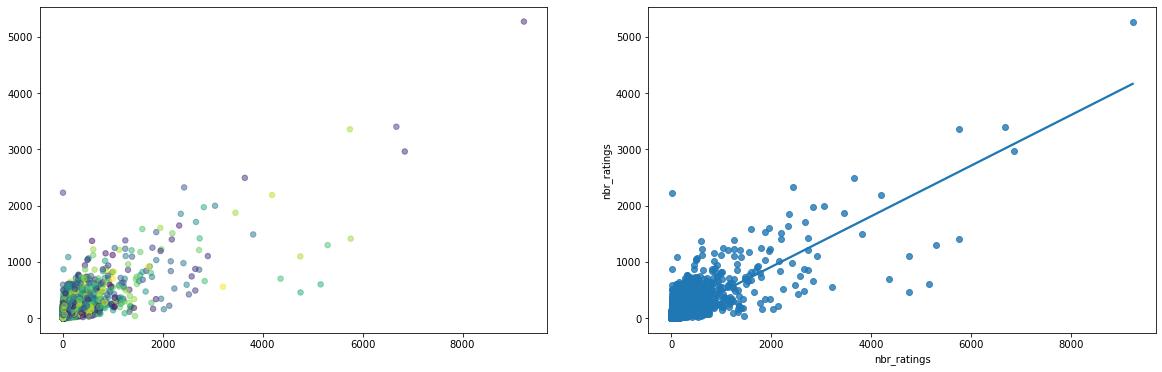

In [95]:
import seaborn as sns

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
colors = np.random.rand(beers2.shape[0])
plt.scatter(beers2['ba']['nbr_ratings'], beers2['rb']['nbr_ratings'], s=30, alpha=0.5, c= colors)

plt.subplot(1, 2, 2)
sns.regplot(beers2['ba']['nbr_ratings'], beers2['rb']['nbr_ratings'], ci=None)

plt.show()

In [103]:
print('Pearson coefficient : {pearson}'.format(pearson = stats.pearsonr(beers2['ba']['nbr_ratings'], beers2['rb']['nbr_ratings'])))
print('Spearman coefficient : {spearman}'.format(spearman = stats.spearmanr(beers2['ba']['nbr_ratings'], beers2['rb']['nbr_ratings'])))
stats.ttest_rel(beers2['ba']['nbr_ratings'], beers2['rb']['nbr_ratings'])

Pearson coefficient : (0.7737549101334047, 0.0)
Spearman coefficient : SpearmanrResult(correlation=0.4941042211279968, pvalue=0.0)


Ttest_relResult(statistic=-3.318994921163729, pvalue=0.0009041276417921556)

We can see that the number of ratings of each beer from the two websites are very correlated. 
- The p-values of the two tests are equals to 0, so the correlation is significant. 
- The p-value of the paired t-test is also very low, which means that the results are pairwise correlated. 
<br> <br>Hence, we can sum the number of ratings from each website in order to filter our data afterwise.

In [109]:
beers2['merged', 'nbr_ratings'] = beers2['ba', 'nbr_ratings'] + beers2['rb', 'nbr_ratings']
beers2.head()

C:\Users\affol\AppData\Local\Temp\ipykernel_14612\1252895236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beers2['merged', 'nbr_ratings'] = beers2['ba', 'nbr_ratings'] + beers2['rb', 'nbr_ratings']


ba                                                            \
  beer_id           beer_name nbr_matched_valid_ratings nbr_ratings   
0   19827            Legbiter                        59          75   
1   20841   St. Patrick's Ale                         6           8   
2   20842  St. Patrick's Best                        48          64   
3   22659  St. Patrick's Gold                         1           1   
4  178681       Sheelin Stout                         0           0   

                   rb                                      \
  nbr_reviews beer_id                           beer_name   
0          59   37923           Strangford Lough Legbiter   
1           6   41286   Strangford Lough St. Patricks Ale   
2          48   41287  Strangford Lough St. Patricks Best   
3           1   41285  Strangford Lough St. Patricks Gold   
4           0  230283                       Sheelin Stout   

                                             merged  
  nbr_matched_valid_ratings nbr_ratings nbr_ratings  
0                        89          89         164  
1                        11          11          19  
2                        74          74         138  
3                         4           4           5  
4                         2           2           2

Now, let's look at some basic statistics. 

In [110]:
beers2.merged.nbr_ratings.describe()

count    45640.000000
mean        43.308633
std        206.096912
min          0.000000
25%          4.000000
50%          9.000000
75%         28.000000
max      14500.000000
Name: nbr_ratings, dtype: float64

Still many beers don't have many ratings on both websites. Hence, to make our analysis more significant, we have decided to take off all the beers with a number of ratings smaller or equals to the value of the mean. Actually, to evaluate the popularity of one beer over time, having only 10 ratings or even less is not meaningful for our project. 

In [125]:
mean = beers2.merged.nbr_ratings.mean()
beers_filtered = beers2.loc[beers2['merged']['nbr_ratings'] > mean]
print("Shape before filtering : {s1}\nShape after filtering : {s2}".format(s1=beers.shape[0], s2=beers_filtered.shape[0]))
beers_filtered.head()

Shape before filtering : 45640
Shape after filtering : 7833


ba                                                               \
   beer_id              beer_name nbr_matched_valid_ratings nbr_ratings   
0    19827               Legbiter                        59          75   
2    20842     St. Patrick's Best                        48          64   
42  114436            Brigid Fire                         4           6   
43   69626                 Bronze                        34          53   
50  212312  Goddess Of The Spring                         1           2   

                    rb                                         \
   nbr_reviews beer_id                              beer_name   
0           59   37923              Strangford Lough Legbiter   
2           48   41287     Strangford Lough St. Patricks Best   
42           2  244927       Celt Experience Celt Brigid Fire   
43          34   89894            Celt Experience Celt Bronze   
50           1  326990  Celt Experience Goddess Of The Spring   

                                              merged  
   nbr_matched_valid_ratings nbr_ratings nbr_ratings  
0                         89          89         164  
2                         74          74         138  
42                        83          83          89  
43                       185         185         238  
50                        49          49          51

In [126]:
beers_filtered.merged.nbr_ratings.describe()

count     7833.000000
mean       201.445551
std        465.634521
min         44.000000
25%         59.000000
50%         90.000000
75%        170.000000
max      14500.000000
Name: nbr_ratings, dtype: float64

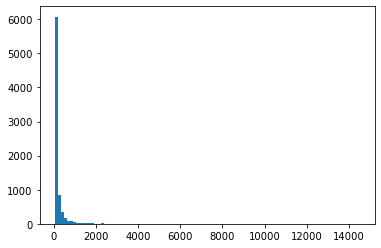

In [128]:
plt.hist(beers_filtered['merged']['nbr_ratings'], bins = 100)
plt.show()

The distribution of the number of ratings on the two websites is still unbalanced with 50% of the beers with a value under 90, whereas only 25% of the data is between 170 and 14500. We would like to only keep these 25% of the beers at first insight because only 90 ratings is still not much, but we will continue with this dataset for the moment because we would lose a lot of data otherwise. But we will keep in mind that observation if our analysis won't be successful. 

Now, let's go back to the initial DataFrame and filter out the rows we have selected above. 

In [132]:
index_to_filter = beers_filtered.index
new_beers = beers.iloc[index_to_filter,:]
new_beers.head()

ba                                                                \
    abv   avg avg_computed avg_matched_valid_ratings ba_score beer_id   
0   4.8  3.45     3.439867                  3.504068     80.0   19827   
2   4.2  3.56     3.556094                  3.580417     82.0   20842   
42  6.3  3.90     3.893333                  3.780000      NaN  114436   
43  4.5  3.71     3.691509                  3.732353     84.0   69626   
50  6.0  3.72     3.755000                  3.690000      NaN  212312   

                                                             \
                beer_name beer_wout_brewery_name brewery_id   
0                Legbiter               Legbiter      10093   
2      St. Patrick's Best       Patricks Best St      10093   
42            Brigid Fire            Fire Brigid      20776   
43                 Bronze                 Bronze      20776   
50  Goddess Of The Spring      Spring Goddess Of      20776   

                                          ...         rb                    \
                            brewery_name  ... brewery_id      brewery_name   
0   Strangford Lough Brewing Company Ltd  ...       4959  Strangford Lough   
2   Strangford Lough Brewing Company Ltd  ...       4959  Strangford Lough   
42                   The Celt Experience  ...      14338   Celt Experience   
43                   The Celt Experience  ...      14338   Celt Experience   
50                   The Celt Experience  ...      14338   Celt Experience   

                                                                              \
   nbr_matched_valid_ratings nbr_ratings overall_score                 style   
0                         89          89          23.0  Golden Ale/Blond Ale   
2                         74          74          26.0                Bitter   
42                        83          83          87.0       Specialty Grain   
43                       185         185          52.0                Bitter   
50                        49          49          78.0                Saison   

                            scores            
   style_score    zscore      diff       sim  
0         27.0 -0.698304  1.000000  1.000000  
2         25.0 -0.862119  0.527141  1.000000  
42        96.0  0.190947  1.000000  1.000000  
43        92.0 -0.346027  1.000000  1.000000  
50        58.0  0.017223  0.603086  0.915537  

[5 rows x 33 columns]

In [133]:
new_beers.to_csv('beers_matched_filtered.csv', sep=',')

We keep some values we will need in the next parts of our data pre-processing. 

In [134]:
beer_ids_ba = new_beers.ba.beer_id
beer_ids_ba = new_beers.rb.beer_id

### Retrieve the dates associated to each beer review from both website 

To be able to make our analysis, we need to know the specific dates of the beer reviews in order to see the evolution of the ratings over the time. 
As the file was really big to open, we had to split the file using the Unix command `split -l 5000 -d --additional-suffix=.txt $FileName ratings.txt`. Then, we applied the following algorithm to extract the dates and the beer id of each review. Finaaly, not to loose the results, we stored them in two different csv files. 

In [28]:
import os
nb_fics = 99911346
beer_ids = []
beer_dates = []

"""
for i in range(nb_fics) :
    if i < 10 :
        name = 'x0' + str(i) +'.txt'
    else : 
        name = 'x' + str(i) +'.txt'

    fic = open(name, mode='r', encoding='utf-8')
    for line in fic : 
        if line.startswith('beer_id') :
            split = line.split()
            beer_ids.append(split[1])
        if line.startswith('date') :
            split = line.split()
            beer_dates.append(split[1])
    fic.close()
    os.remove(name)
"""

FileNotFoundError: [Errno 2] No such file or directory: 'x99920225.txt'

In [39]:
import pandas as pd
date_ids = pd.DataFrame({   'beer_id' : beer_ids,
                            'date' : beer_dates})

date_ids.head()

,beer_id,date
0,93180,1391770800
1,93180,1389870000
2,93180,1387796400
3,93180,1386414000
4,93180,1386327600


In [38]:
date_ids.to_csv('dates_reviews_ba.csv')